# Predicting Cirrhosis Patient Survival Based on Medical Features

Predicting cirrhosis patient survival is driven by the need to improve clinical decision-making in the management of cirrhosis. Healthcare providers face challenges in assessing which patients are at high risk of mortality and which ones have a higher likelihood of recovery or survival.

By developing a predictive model based on the dataset of cirrhosis patients, we aim to achieve two key objectives:

1.	Identification of Risk Factors: Understanding which factors, such as age, sex, and specific blood test results (e.g., bilirubin, albumin, prothrombin time), have a significant impact on patient survival. This information can guide medical professionals in identifying high-risk individuals.

2.	Survival Prediction: Building a machine learning model capable of predicting a patient's survival status (survived or not survived) based on the available medical data. The model can assist in prognosis by providing predictions that complement clinical judgment.


# Step-by-step guide on how to run a Python notebook in Google Colab

**Upload Dataset:**

Go to the "Files" section in the left-hand pane of Google Colab.

Click on the Upload button and select your dataset from your local machine.

Once uploaded, the file will appear in the "Files" section, and you can access it using its filename in the code.

**Running the Sections:**

The notebook is divided into 4 main sections - Data Loading & Pre Processing, Exploratory Data Analysis & Visualisation, Model Training, Testing & Prediction.

Start by running the first section, Data Loading & Pre Processing. To do so, click the play button (a triangle) on the left side of the code block.

Continue running each subsequent section in the order mentioned. Click the play button next to each section header.
Running them in the right order ensures that the outputs from each step are correctly generated.

**Viewing the Outputs:**

To view the output of each section, you can click the arrow icon next to the section's heading to collapse or expand the section contents.

Once collapsed, you can easily switch between sections to view the results without having to scroll through the code.

# Data Loading & Pre Processing


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: Load the CSV file
cirrhosis_data = pd.read_csv("cirrhosis.csv")

In [36]:
#shape of dataset
cirrhosis_data.shape

(418, 20)

In [37]:
# Head of the dataset
cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [38]:
# Convert 'Age' from days to years (rounded to nearest whole number)
cirrhosis_data['Age (years)'] = (cirrhosis_data['Age'] / 365).round().astype(int)

# Remove the old 'Age' column
cirrhosis_data.drop(columns=['Age'], inplace=True)

# Reorder the columns to make 'Age (years)' the 5th column
cols = cirrhosis_data.columns.tolist()
cols.insert(4, cols.pop(cols.index('Age (years)')))  # Move 'Age (years)' to the 5th position
cirrhosis_data = cirrhosis_data[cols]

# Display the first few rows to check
cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age (years),Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


#Exploratory Data Analysis & Visualisation

In [39]:
# Basic information about the dataset
print("\nDataset Info:")
cirrhosis_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age (years)    418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64


In [40]:
# Identifying numerical and categorical columns
numerical_cols = cirrhosis_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = cirrhosis_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
['ID', 'N_Days', 'Age (years)', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

Categorical Columns:
['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [41]:
# Check for missing values
print("\nMissing Values:")
missing_values = cirrhosis_data.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


**Filling Missing Values**

**Imputation on Numerical Data:** The *KNNImputer* is applied only to numerical columns to impute missing values based on the similarity of rows (using the K-nearest neighbors algorithm). KNN Imputation uses the K-Nearest Neighbors algorithm to impute missing values based on the closest neighbors.

**Imputation on Categorical Data:** For categorical data, missing values are replaced with the *mode* (the most frequent value), which is a common method for filling in missing categories.

In [42]:
from sklearn.impute import KNNImputer

# Separate numerical and categorical columns
numerical_cols = cirrhosis_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = cirrhosis_data.select_dtypes(include=['object', 'category']).columns

# Apply KNN imputation only to numerical columns
imputer = KNNImputer(n_neighbors=5)
cirrhosis_data[numerical_cols] = imputer.fit_transform(cirrhosis_data[numerical_cols])

# Handle missing values in categorical columns by filling with the mode (most frequent value)
for col in categorical_cols:
    cirrhosis_data[col] = cirrhosis_data[col].fillna(cirrhosis_data[col].mode()[0])


In [43]:
# Check if there are any missing values left
cirrhosis_data.isnull().sum()

,0
ID,0
N_Days,0
Status,0
Drug,0
Age (years),0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0


**Univariate Analysis**

The examination of every single variable in the dataset to understand its distribution, central tendency, and variability. It focuses on summarizing and describing data through measures such as mean, median, mode (central tendency), and range, variance, or standard deviation (dispersion).

In [44]:
# Summary statistics
print("\nSummary Statistics:")
cirrhosis_data.describe()


Summary Statistics:


,ID,N_Days,Age (years),Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.00000,418.000000,418.000000
mean,209.500000,1917.782297,50.772727,3.220813,365.196172,3.497440,95.522488,1839.970239,121.751971,122.866029,257.05933,10.733876,3.023923
std,120.810458,1104.672992,10.442880,4.407506,203.714590,0.424972,77.186144,1894.341641,50.449968,55.546342,97.23658,1.023743,0.878522
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.00000,9.000000,1.000000
25%,105.250000,1092.750000,43.000000,0.800000,260.000000,3.242500,45.250000,964.000000,87.797500,90.050000,190.00000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,310.000000,3.530000,73.000000,1282.000000,116.250000,113.000000,251.00000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,394.750000,3.770000,122.850000,1828.000000,143.650000,142.300000,315.50000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.00000,18.000000,4.000000


Visualizing distributions for each feature in a dataset is a crucial step in exploratory data analysis (EDA) to gain insights into the underlying patterns and characteristics of the data.

**Histograms** are useful for visualizing the distribution of a single numerical feature, showing the frequency of data points within specified bins. They help identify the shape, skewness, and presence of multiple peaks in the data.

**Boxplots** provide a summary of a numerical feature's distribution by visualizing its median, quartiles, and potential outliers. They are particularly effective in comparing distributions across different categories and highlighting extreme values.

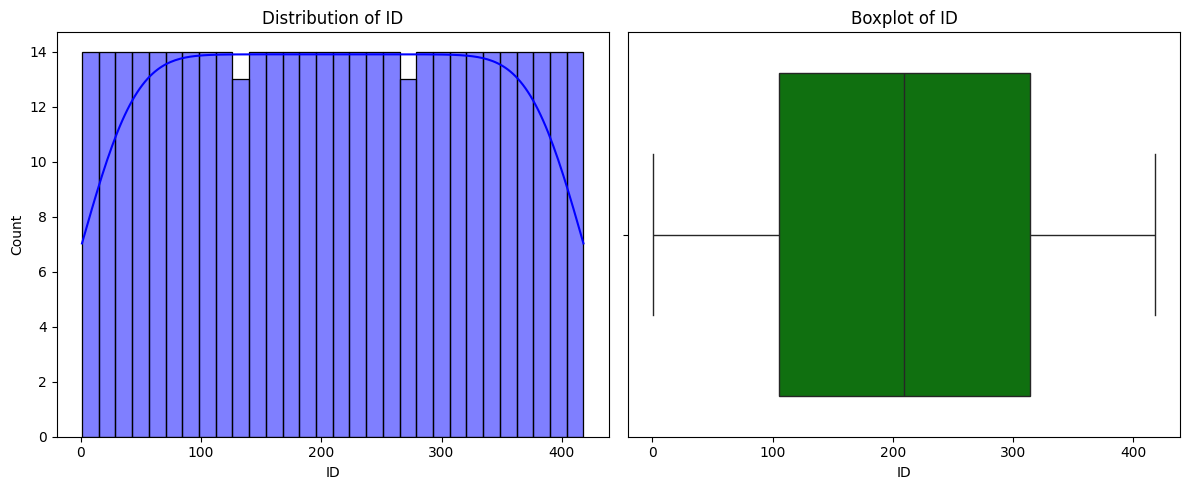

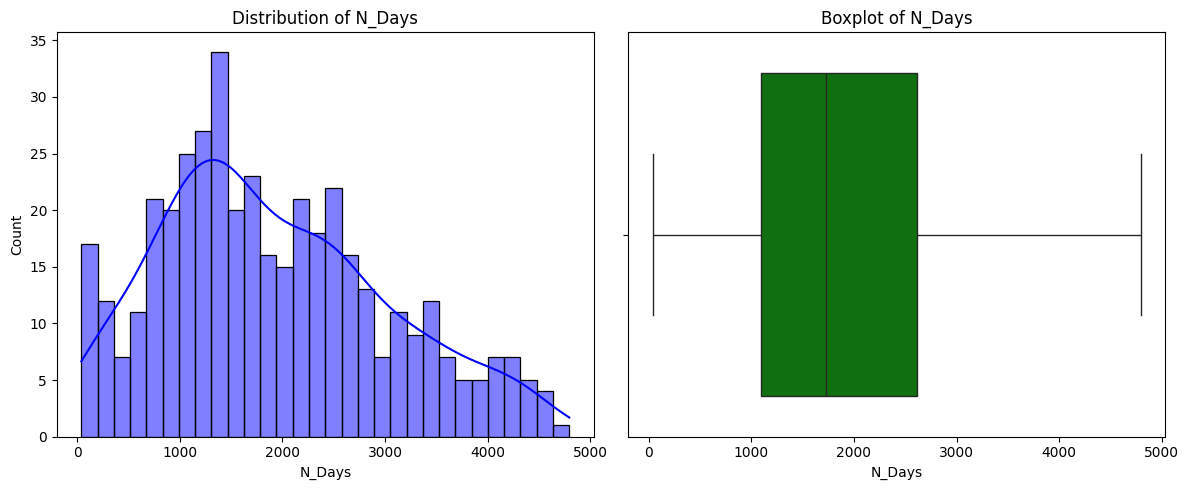

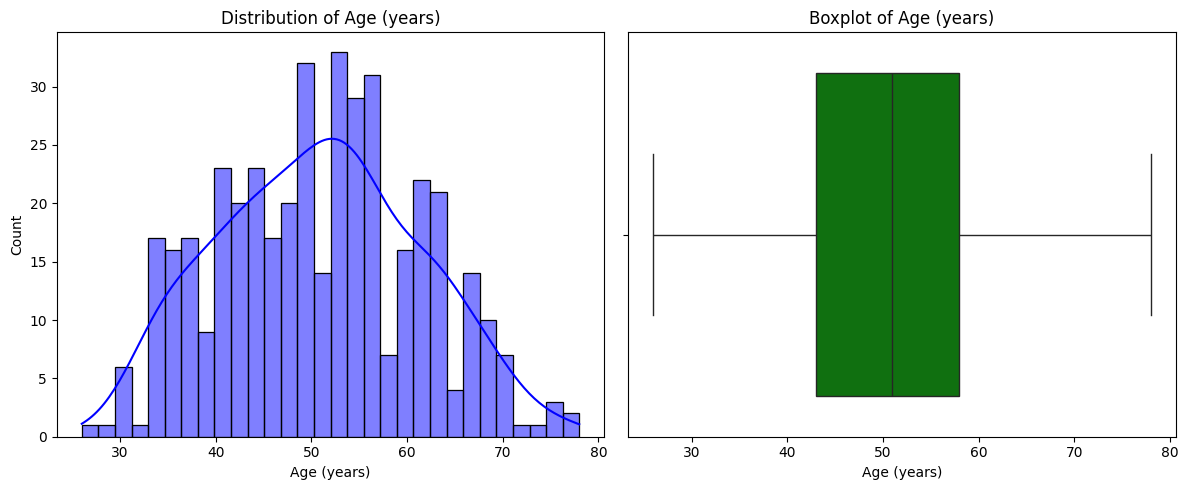

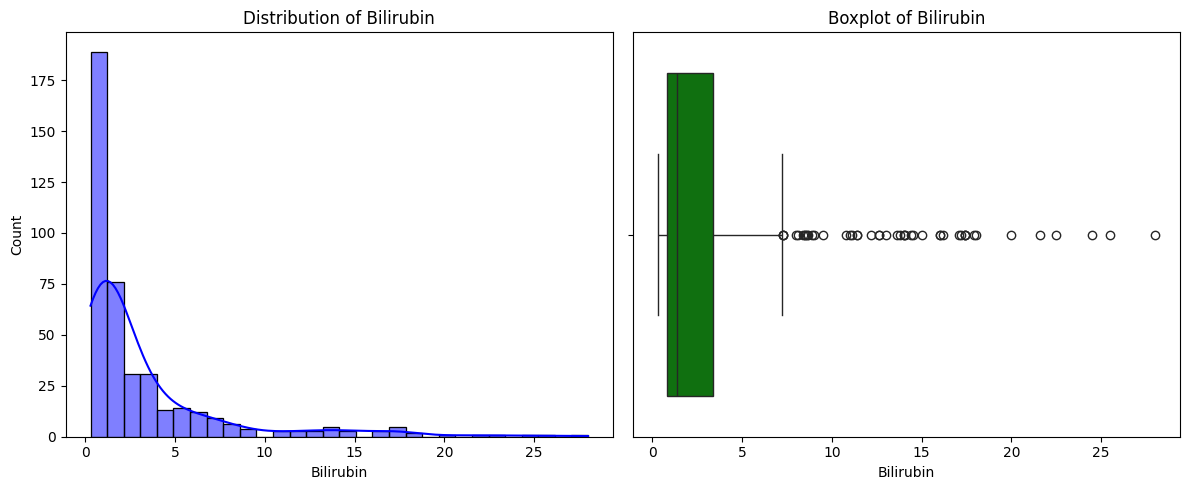

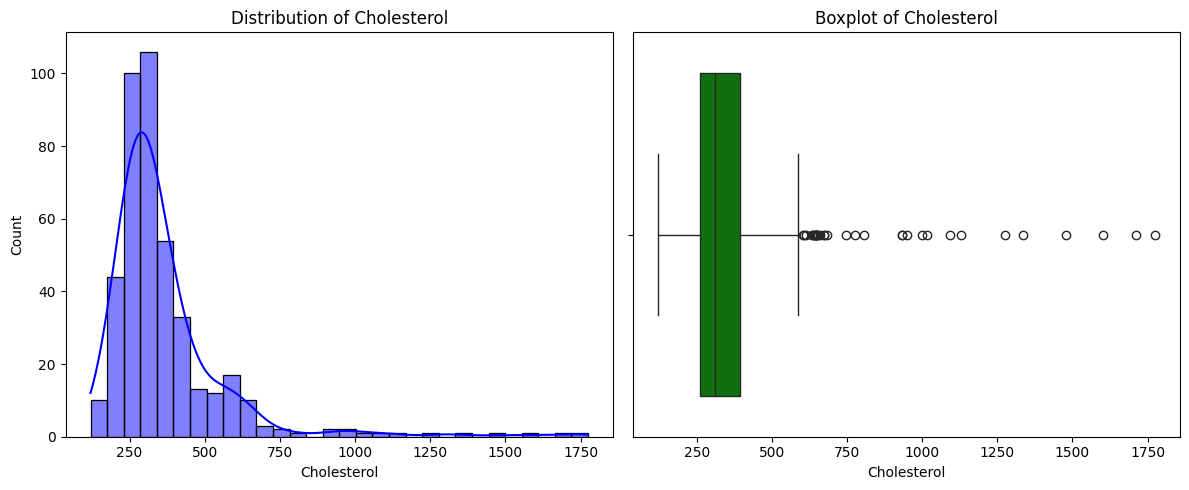

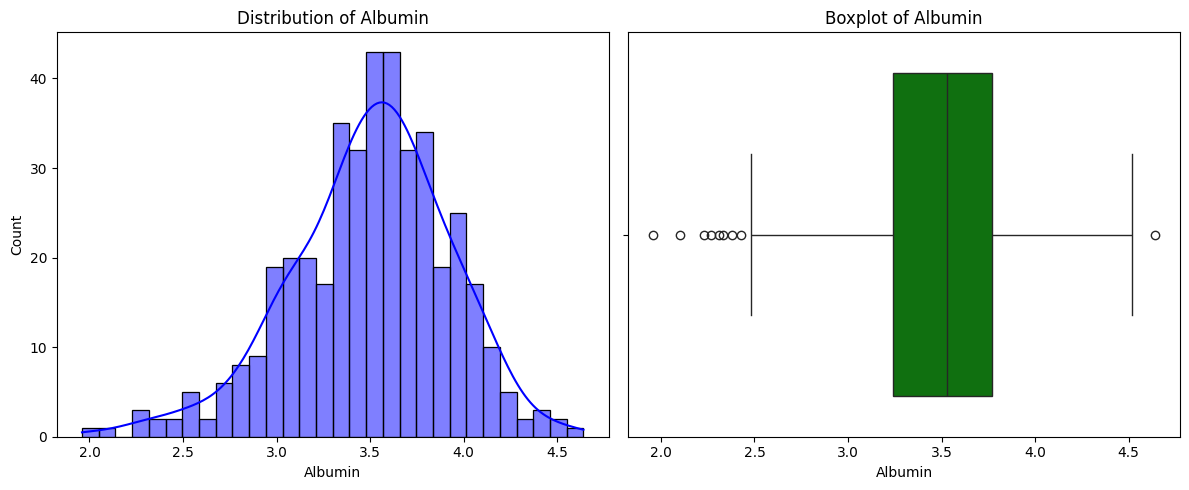

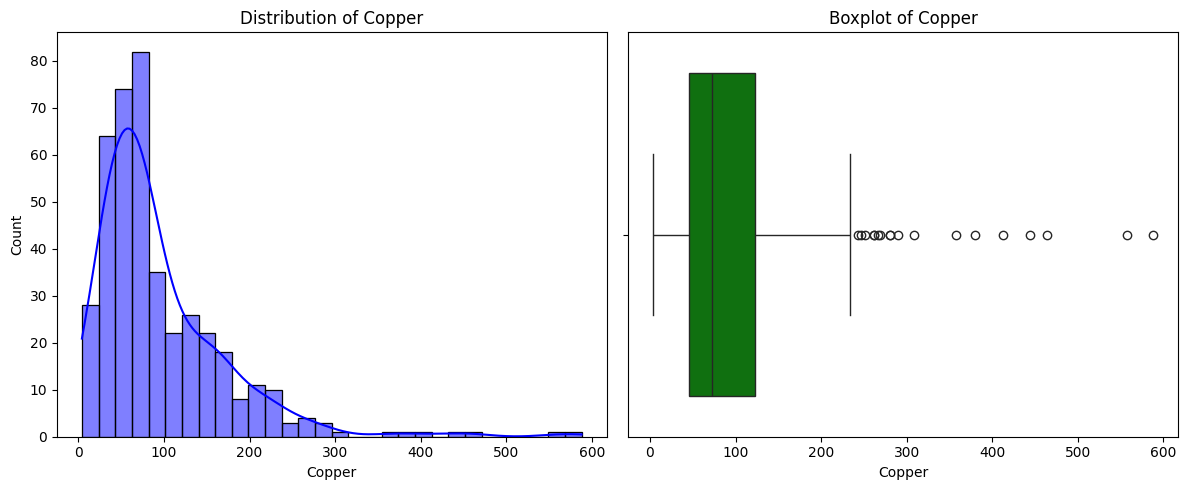

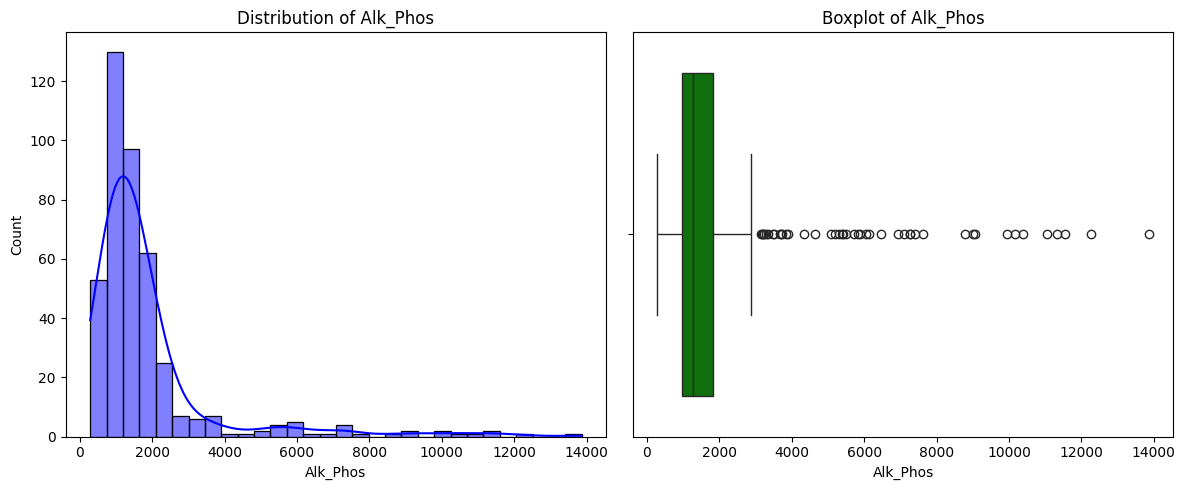

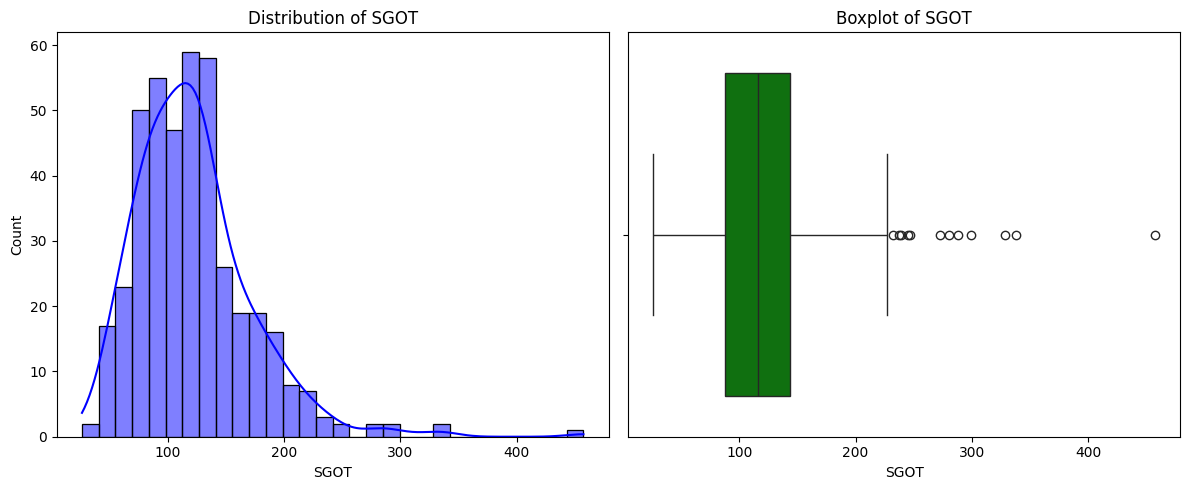

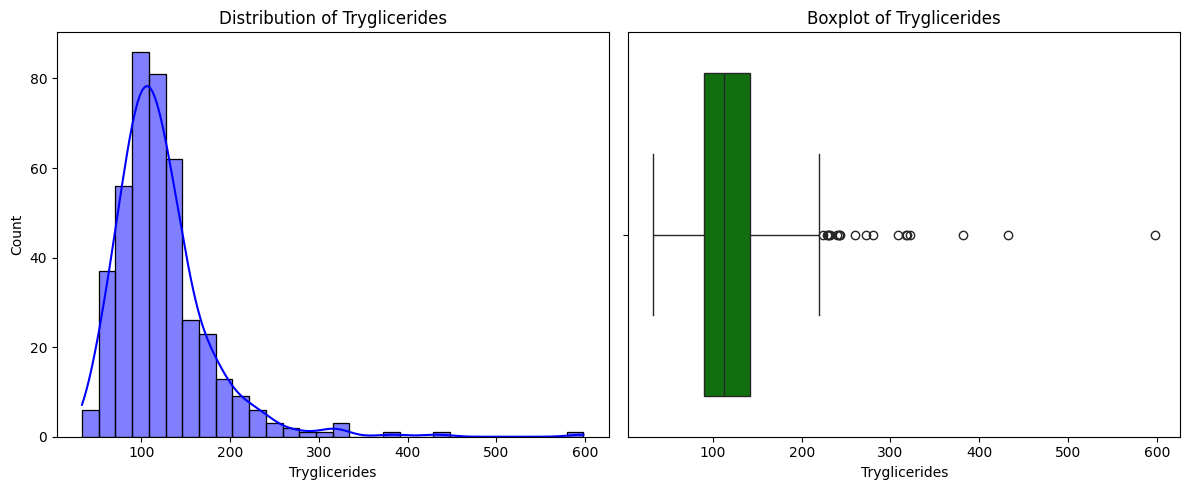

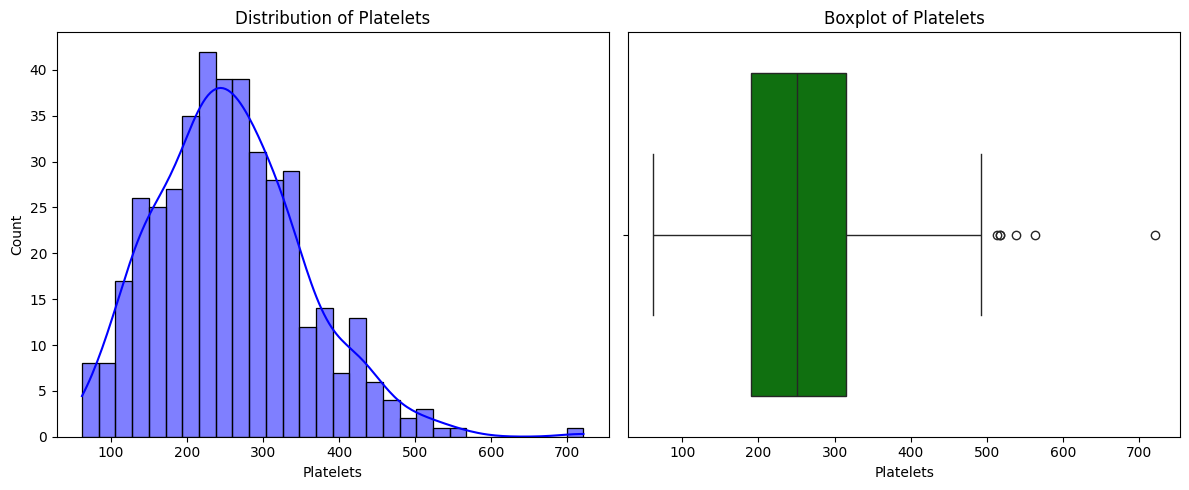

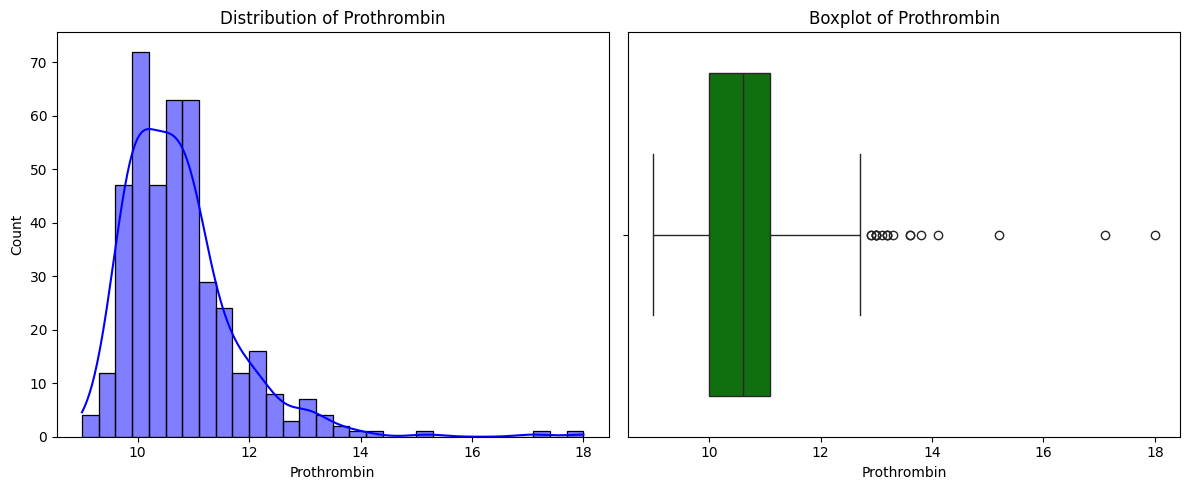

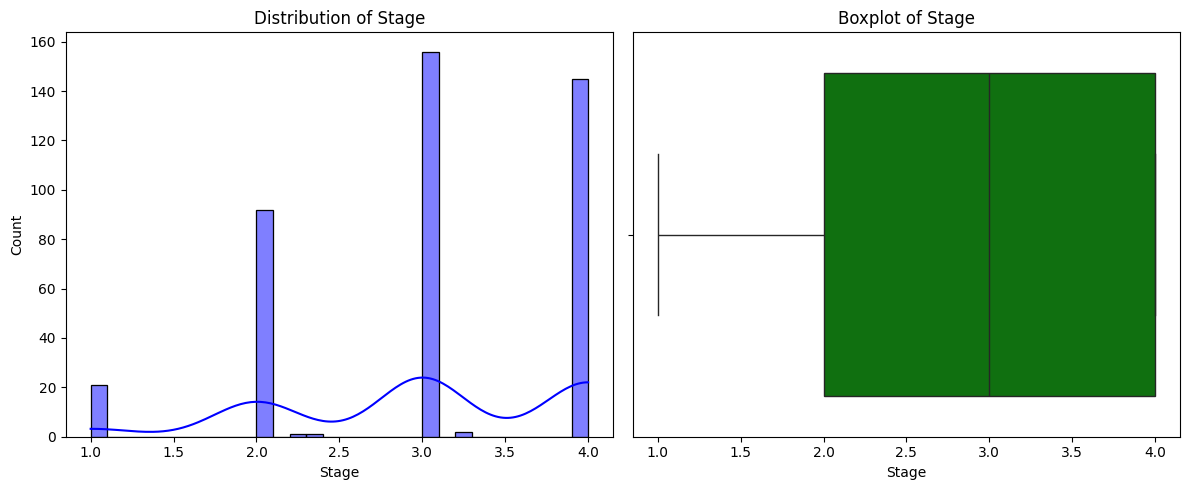

In [45]:
# EDA for categorical columns
for col in numerical_cols:
    # Create a figure for both histogram and boxplot
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(cirrhosis_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(x=cirrhosis_data[col], color='green')
    plt.title(f"Boxplot of {col}")

    # Show the plots
    plt.tight_layout()
    plt.show()

The distributions of all features were explored to identify patterns of central tendency, spread, and skewness. The variables were classified as follows:

**Normal Distribution:** Features such as *age, albumin, and platelets* displayed a bell-shaped distribution, indicating that most observations are clustered around the mean, with symmetric tails on either side. These variables align closely with expected biological norms in a healthy population.

**Right-Skewed Distribution:** Features including *bilirubin, cholesterol, copper, alkaline phosphatase (alk phos), SGOT, triglycerides, and prothrombin* exhibited right-skewed distributions, where a majority of values are concentrated near lower ranges, with a long tail extending towards higher values. This skewness might indicate the presence of outliers or extreme cases often observed in diseased conditions.

**Outliers:** Observations of extreme values were likely present, especially in skewed variables, necessitating outlier detection and treatment strategies.


EDA for Categorical Columns:


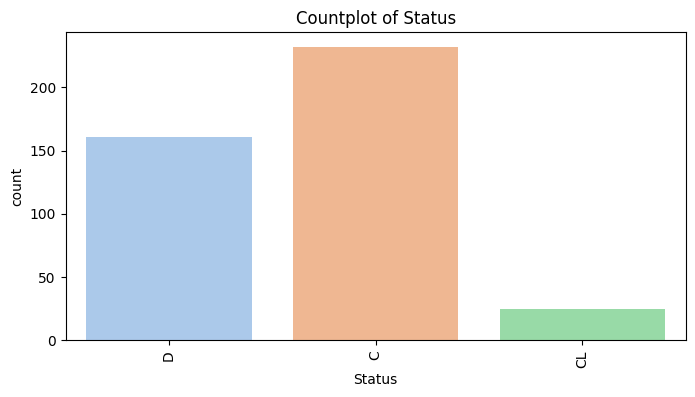

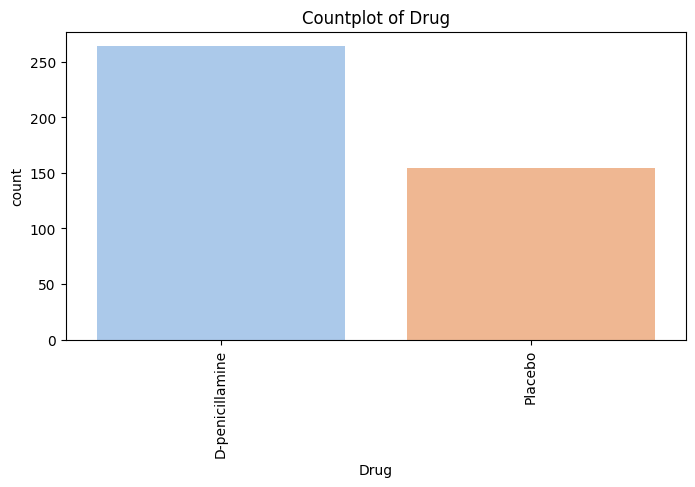

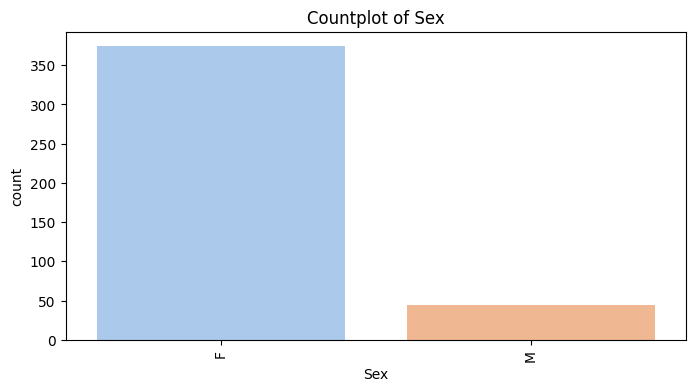

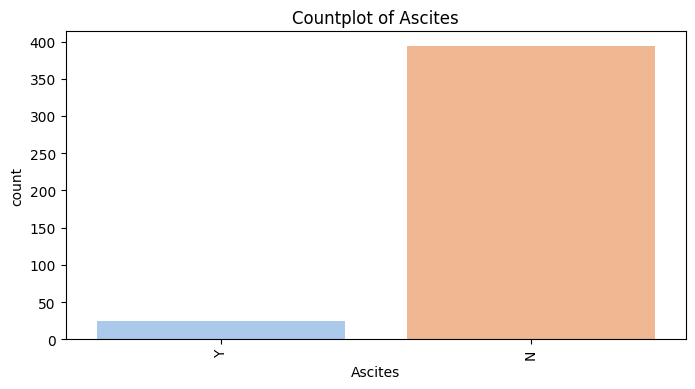

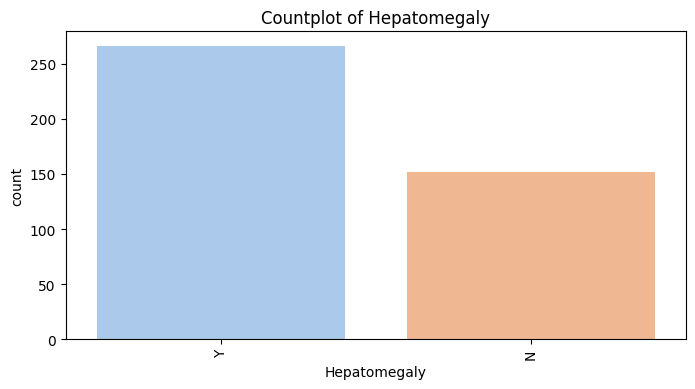

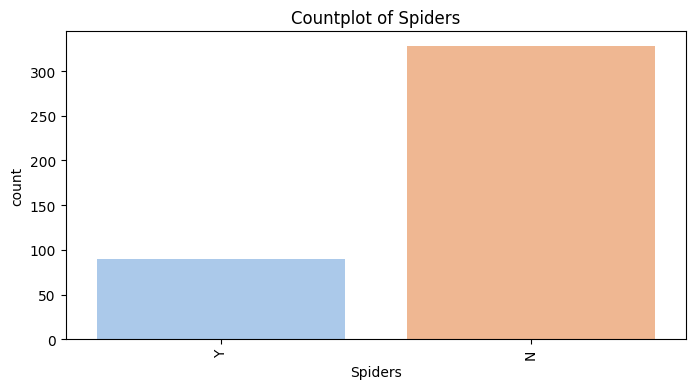

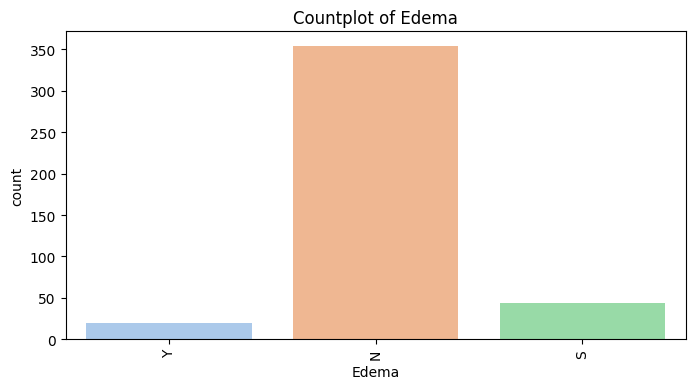

In [46]:
# EDA for categorical columns
print("\nEDA for Categorical Columns:")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=cirrhosis_data[col], hue=cirrhosis_data[col], palette='pastel', legend=False)

    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=90)
    plt.show()

**Association between Numerical Variables and Status (Target Variable)**

**Boxplots**: We use boxplots to visually explore how a numerical variable varies across different categories of a categorical variable. This allows us to see the spread, central tendency (e.g., median), and potential outliers of the numerical variable within each category.

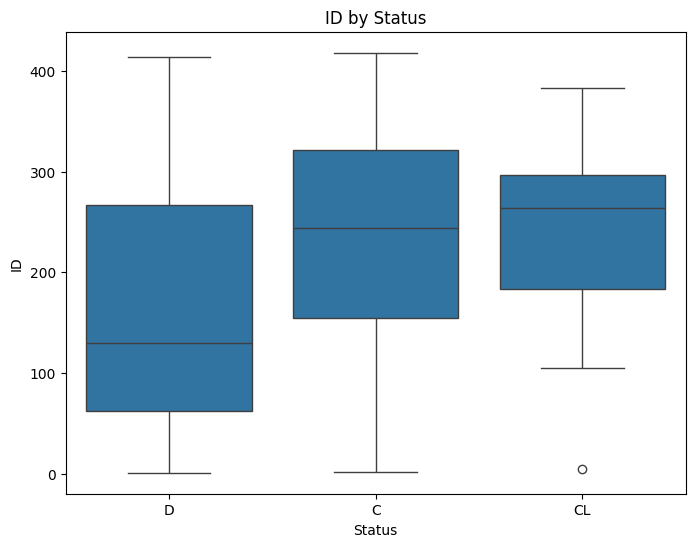

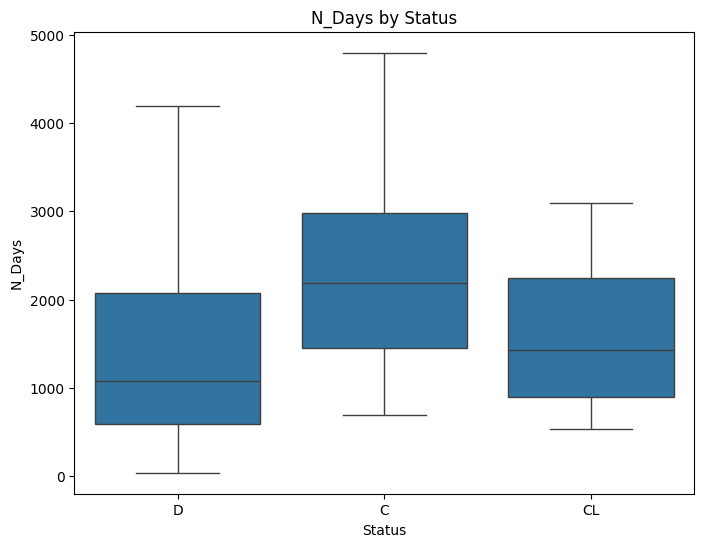

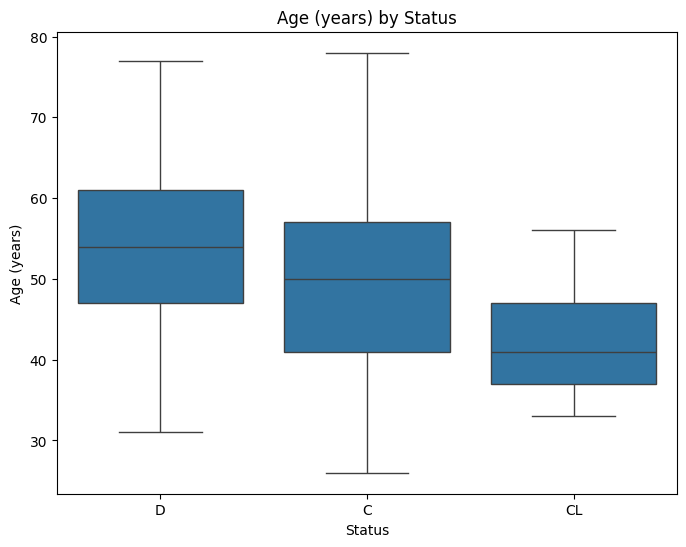

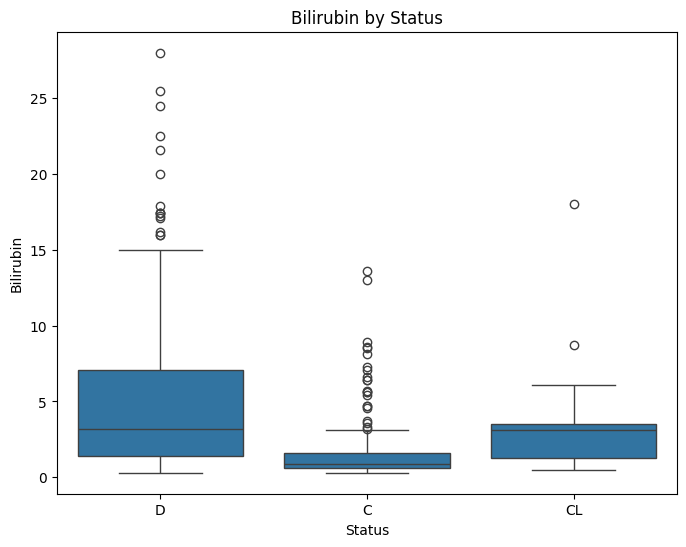

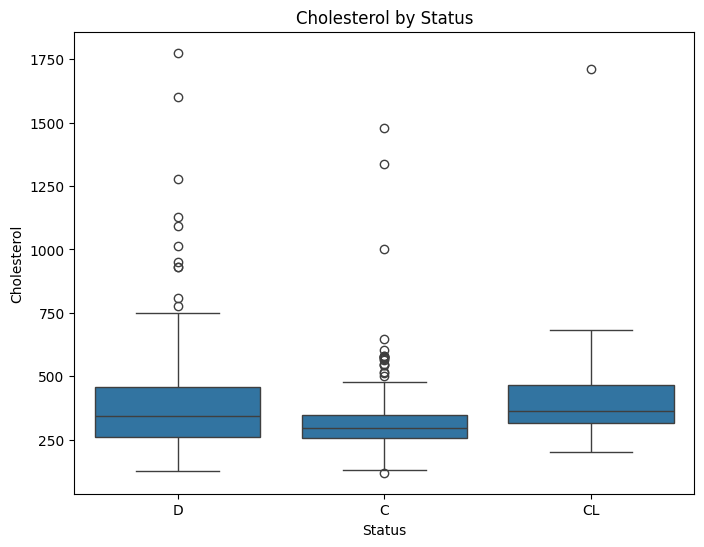

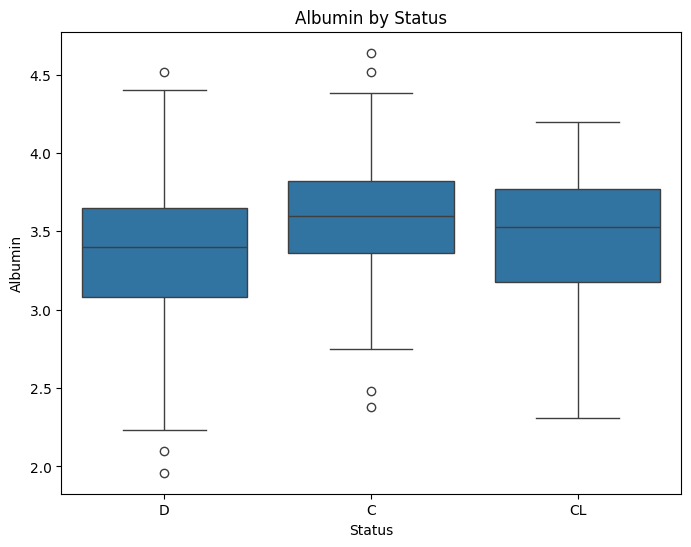

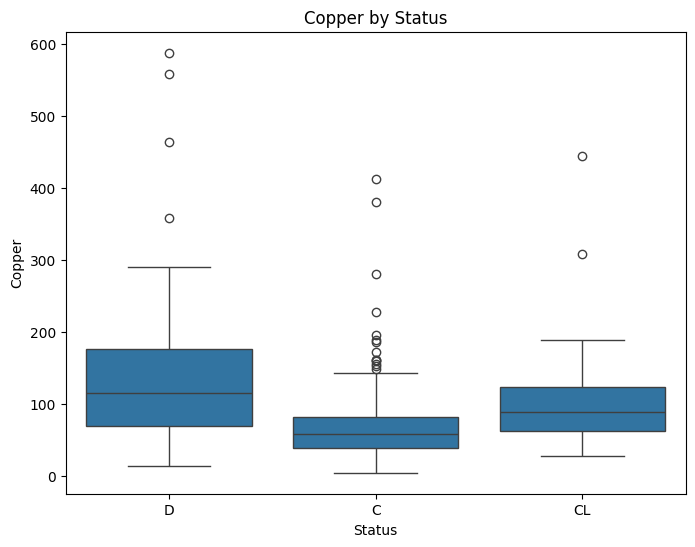

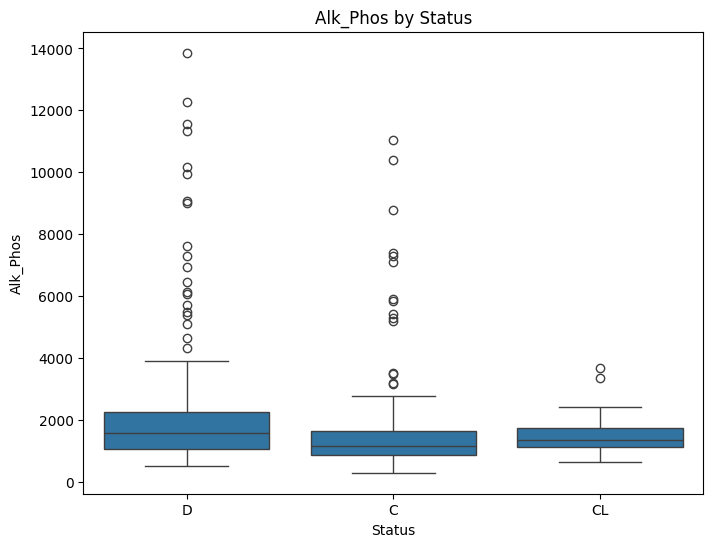

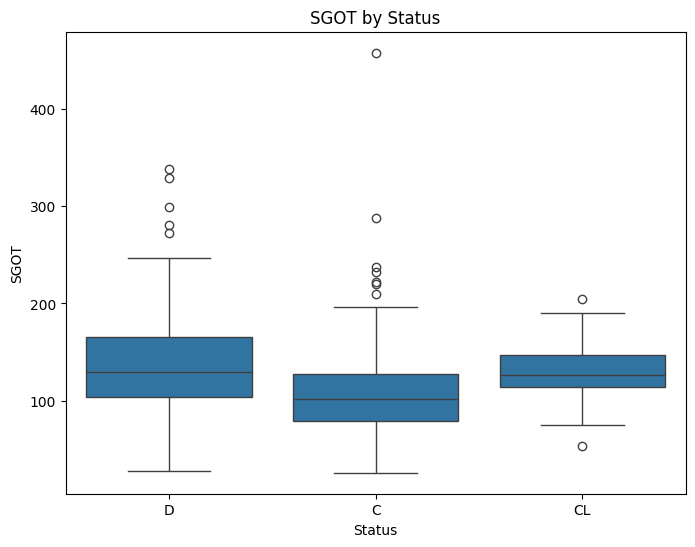

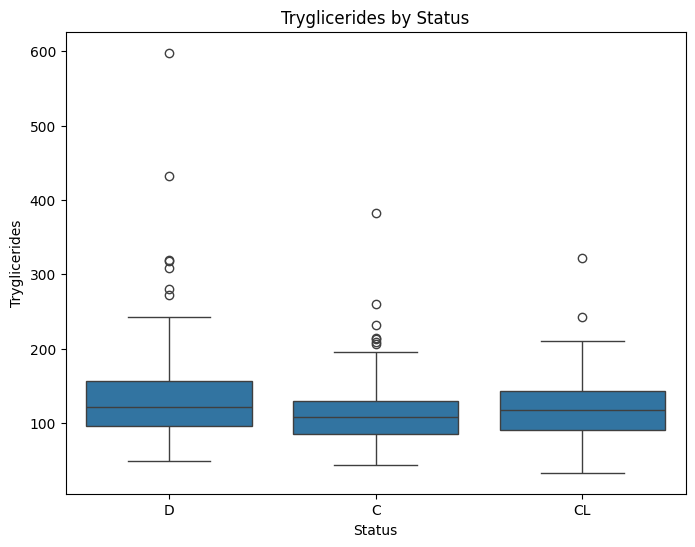

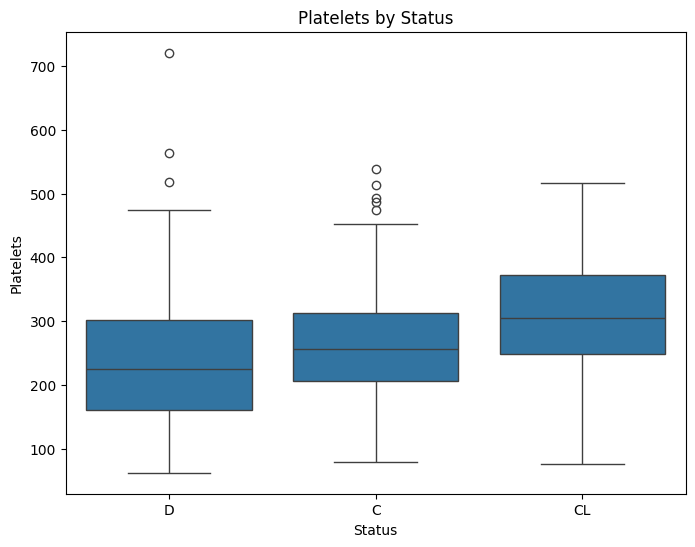

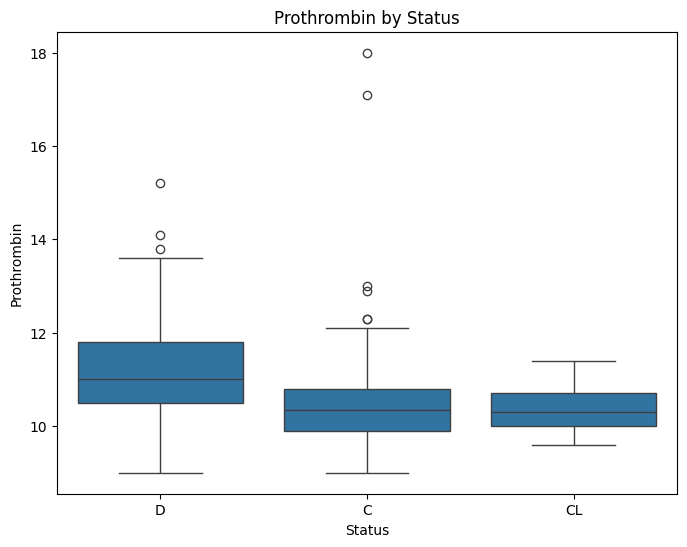

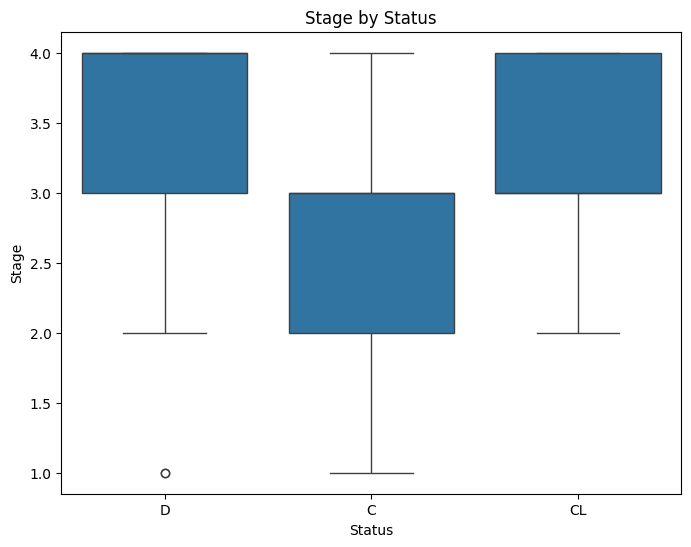

In [47]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Loop through each numerical column and create a boxplot
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Status', y=column, data=cirrhosis_data)
    plt.title(f"{column} by Status")
    plt.show()


**ANOVA (Analysis of Variance)**

The results of the ANOVA test for each numerical variable against the categorical variable Status (which could represent different stages of cirrhosis like D, C, and CL) provide insights into whether there is a significant difference in the means of the numerical variables across the different categories of Status.

ANOVA produces an F-statistic, which is a ratio of the between-group variance to the within-group variance. A **high F-statistic** and the associated **small p-value** (typically less than 0.05), indicates that the group means are very different from each other relative to the variation within the groups, suggesting a **significant effect** of the categorical variable on the numerical variable.

In [48]:
from scipy import stats

# Loop through each numerical column and perform ANOVA with 'Status'
for col in numerical_cols:
    # Group the data by 'Status' for each numerical column
    group_d = cirrhosis_data[cirrhosis_data['Status'] == 'D'][col]
    group_c = cirrhosis_data[cirrhosis_data['Status'] == 'C'][col]
    group_cl = cirrhosis_data[cirrhosis_data['Status'] == 'CL'][col]

    # Perform the ANOVA test
    f_stat, p_value = stats.f_oneway(group_d, group_c, group_cl)

    # Print the results
    print(f"ANOVA for {col}:")
    print(f"F-statistic: {f_stat}, P-value: {p_value}\n")


ANOVA for ID:
F-statistic: 20.28570188464145, P-value: 3.93111305501857e-09

ANOVA for N_Days:
F-statistic: 44.93147454372553, P-value: 2.1700955276966606e-18

ANOVA for Age (years):
F-statistic: 20.32312975872366, P-value: 3.799352708520666e-09

ANOVA for Bilirubin:
F-statistic: 46.99528079934279, P-value: 4.0060030337023026e-19

ANOVA for Cholesterol:
F-statistic: 10.337201033212047, P-value: 4.1577270339644305e-05

ANOVA for Albumin:
F-statistic: 15.260927571507652, P-value: 4.024017053712767e-07

ANOVA for Copper:
F-statistic: 40.64093977994638, P-value: 7.609099428466146e-17

ANOVA for Alk_Phos:
F-statistic: 9.808966186731869, P-value: 6.880887874462056e-05

ANOVA for SGOT:
F-statistic: 17.213227506760663, P-value: 6.58133041501654e-08

ANOVA for Tryglicerides:
F-statistic: 10.659381200091277, P-value: 3.0596598949390644e-05

ANOVA for Platelets:
F-statistic: 5.952751971555328, P-value: 0.002825797932743743

ANOVA for Prothrombin:
F-statistic: 30.928478585041915, P-value: 3.016091

**Result Interpretation**

The **p-values** are extremely **small** for most variables (much smaller than 0.05), suggesting that these factors (such as bilirubin, albumin, platelets, etc.) are strongly associated with the survival status or stage of cirrhosis.

The **high F-statistics** also indicate that the variation between the groups (e.g., different survival outcomes) is much larger than the variation within the groups, supporting the importance of these features in survival prediction.

The results show that **all** the numerical variables tested have statistically **significant differences** across the Status categories (D/C/CL), suggesting that these variables are important predictors in distinguishing between patient statuses.

**Chi-Square Test for Categorical Variables & Status (Target Variable)**

Since both the target variable and the predictor variables are categorical, we use the Chi-Square test of independence to check if there is a significant relationship between two categorical variables.


In [49]:
from scipy.stats import chi2_contingency

# Loop to perform Chi-Square test for each categorical variable
for col in categorical_cols:
    contingency_table = pd.crosstab(cirrhosis_data['Status'], cirrhosis_data[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi Square Test for Status & {col}")
    print("Chi2 Statistic:", chi2)
    print("P-value:", p)



Chi Square Test for Status & Status
Chi2 Statistic: 836.0000000000001
P-value: 1.2221389555404172e-179

Chi Square Test for Status & Drug
Chi2 Statistic: 0.024271754428908148
P-value: 0.9879374655506878

Chi Square Test for Status & Sex
Chi2 Statistic: 5.858291641994132
P-value: 0.053442668259367894

Chi Square Test for Status & Ascites
Chi2 Statistic: 35.32976560351079
P-value: 2.1293099118863636e-08

Chi Square Test for Status & Hepatomegaly
Chi2 Statistic: 23.621967383655115
P-value: 7.422581191318827e-06

Chi Square Test for Status & Spiders
Chi2 Statistic: 18.41353107200755
P-value: 0.00010035812333194057

Chi Square Test for Status & Edema
Chi2 Statistic: 40.48334830163611
P-value: 3.438280896422362e-08


**Result Interpretation**

If the p-value is low (typically below 0.05), it suggests there is a significant association between the target variable (survival status) and the feature (sex).

**Significant Associations:** Ascites, Hepatomegaly, Spiders, and Edema have strong associations with survival status. These factors are likely important indicators of a patient's survival.

**Borderline Association:** Sex is weakly associated with survival status, but not strongly enough to be statistically significant.

**No Association:** Drug usage does not appear to impact survival status.

**Encoding**

Encoding is a technique used to convert categorical variables into a numerical format, which is essential for machine learning models that require numerical inputs. Label encoding assigns a unique integer to each category, making it suitable for ordinal variables where the order of categories holds significance.

In this case, **label encoding** was used to convert the categorical target variable (patient status: D/C/CL) into numerical values (0, 1, 2) to make it compatible with machine learning algorithms.

In [50]:
#convert Categorical columns to number by encoding
from sklearn.preprocessing import LabelEncoder

cirrhosis_data['Status']=LabelEncoder().fit_transform(cirrhosis_data['Status'])
cirrhosis_data['Drug']=LabelEncoder().fit_transform(cirrhosis_data['Drug'])
cirrhosis_data['Sex']=LabelEncoder().fit_transform(cirrhosis_data['Sex'])
cirrhosis_data['Ascites']=LabelEncoder().fit_transform(cirrhosis_data['Ascites'])
cirrhosis_data['Hepatomegaly']=LabelEncoder().fit_transform(cirrhosis_data['Hepatomegaly'])
cirrhosis_data['Spiders']=LabelEncoder().fit_transform(cirrhosis_data['Spiders'])
cirrhosis_data['Edema']=LabelEncoder().fit_transform(cirrhosis_data['Edema'])

cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age (years),Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,2,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2.0,4500.0,0,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3.0,1012.0,2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4.0,1925.0,2,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5.0,1504.0,1,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Model Training

In [51]:
# Split Data
from sklearn.model_selection import train_test_split

# dropping unwanted columns
X = cirrhosis_data.drop('Status', axis=1)

# survival status column
y = cirrhosis_data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

# Step 2: Split the data
train_data, test_data = train_test_split(X, test_size=0.2, random_state=42)

# Step 3: Save the splits
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)


In [52]:
X_train.describe()

,ID,N_Days,Drug,Age (years),Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,209.311377,1931.077844,0.374251,50.835329,0.110778,0.056886,0.616766,0.218563,0.188623,3.048802,365.938323,3.500000,91.849102,1751.575449,117.560569,123.611377,259.735928,10.695868,3.004790
std,115.975839,1065.285274,0.484655,10.606523,0.314328,0.231973,0.486904,0.413891,0.487430,4.259071,207.707481,0.421641,70.801971,1732.284055,46.576368,56.536584,97.069302,0.963481,0.888215
min,2.000000,41.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,44.000000,62.000000,9.000000,1.000000
25%,115.250000,1124.500000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,259.250000,3.260000,44.150000,936.500000,85.250000,90.000000,192.250000,10.000000,2.000000
50%,209.500000,1773.000000,0.000000,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000,306.800000,3.525000,73.000000,1241.300000,113.150000,113.200000,253.500000,10.600000,3.000000
75%,306.750000,2606.250000,1.000000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.375000,395.250000,3.787500,121.000000,1801.550000,137.950000,142.950000,317.750000,11.100000,4.000000
max,418.000000,4523.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.640000,464.000000,12258.800000,338.000000,598.000000,721.000000,17.100000,4.000000


**Distribution of numerical values for each feature in X_train**

This visualization helps in understanding the spread and central tendency of the data, as well as identifying any outliers in the training data.

<Axes: >

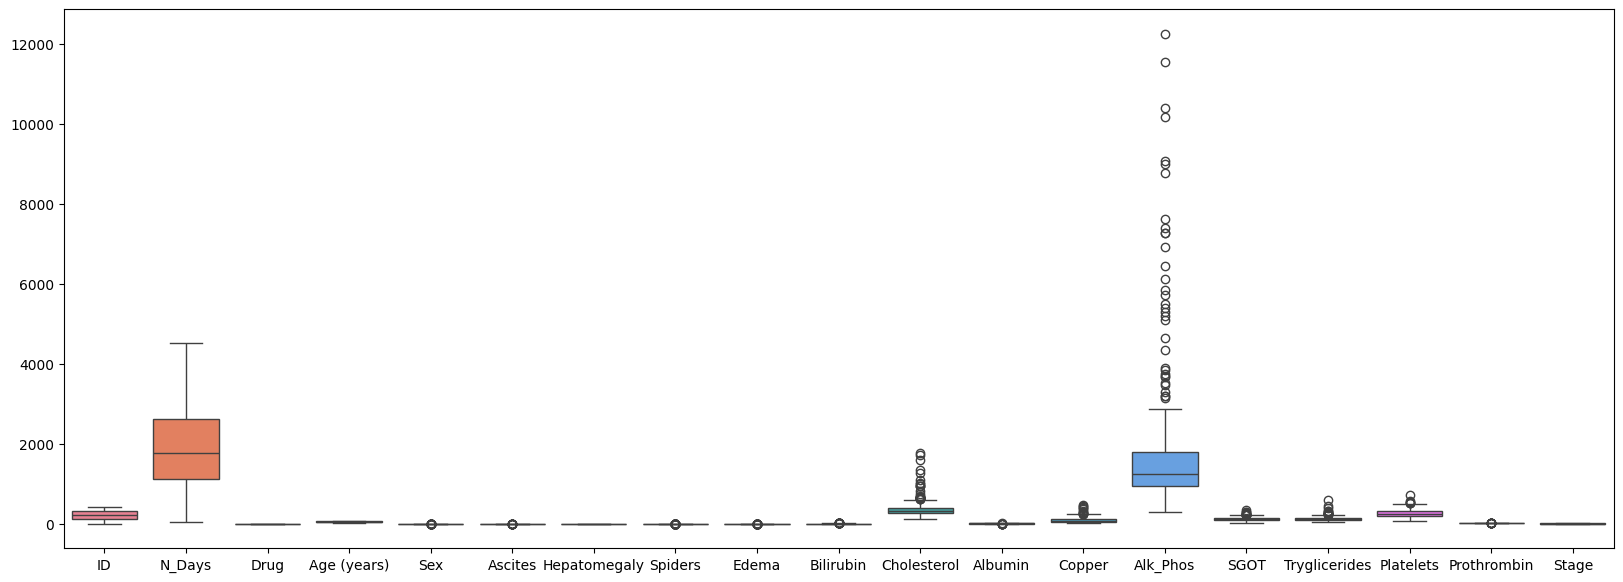

In [53]:
plt.figure(figsize=(20,7))
sns.boxplot(data = X_train)

**Normalizing data**

 This process adjusts the values of numeric columns to a common scale, often between 0 and 1 or by transforming them to have a mean of 0 and a standard deviation of 1. It ensures that features with different scales or units have equal influence in analysis and modeling.

In [54]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming X_train and X_test are originally Pandas DataFrames
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use `transform` for test data to avoid data leakage

# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<Axes: >

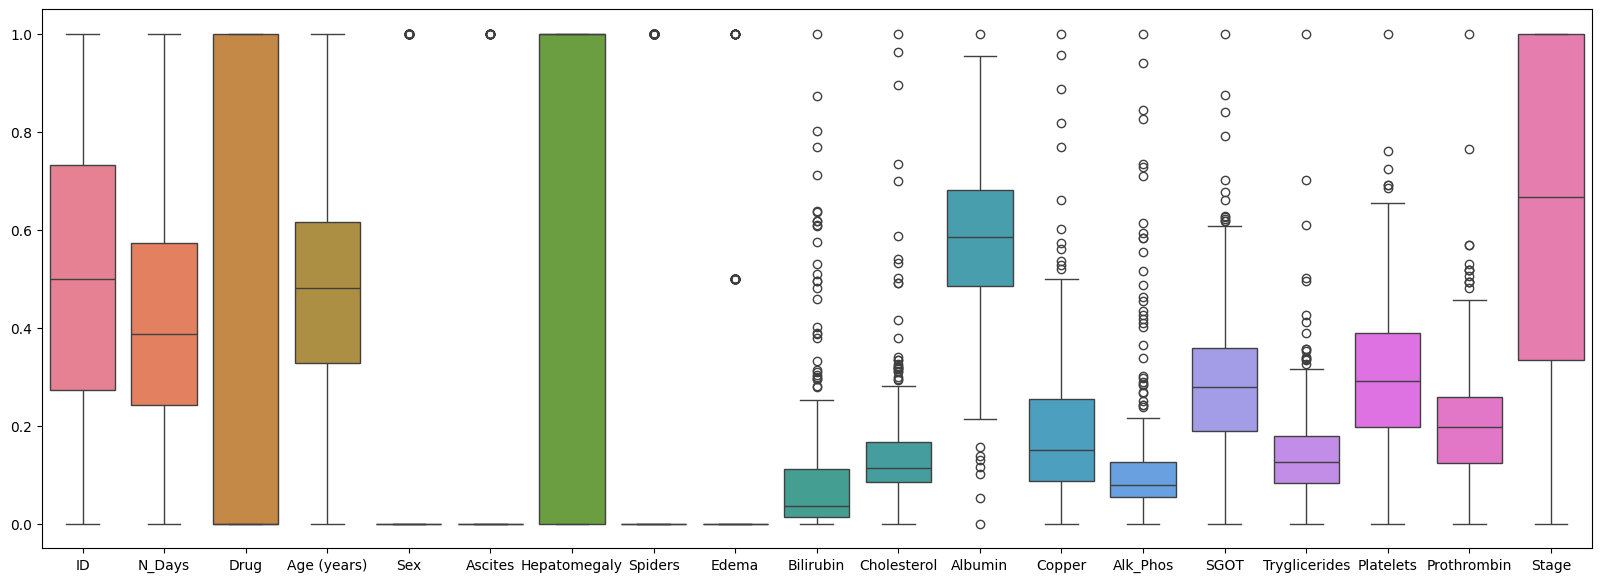

In [55]:
# Boxplot distributions of normalised data
plt.figure(figsize=(20,7))
sns.boxplot(data = X_train_scaled_df)

In [56]:
# Evaluation Metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

def print_error_classification(y_test, predictions):
    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")

    # Precision, Recall, F1-score (using weighted average for multiclass)
    precision = precision_score(y_test, predictions, average='weighted')  # 'weighted' for multiclass
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['D', 'C', 'CL'], yticklabels=['D', 'C', 'CL'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

K-Nearest Neighbors Classifier
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1-Score: 0.76


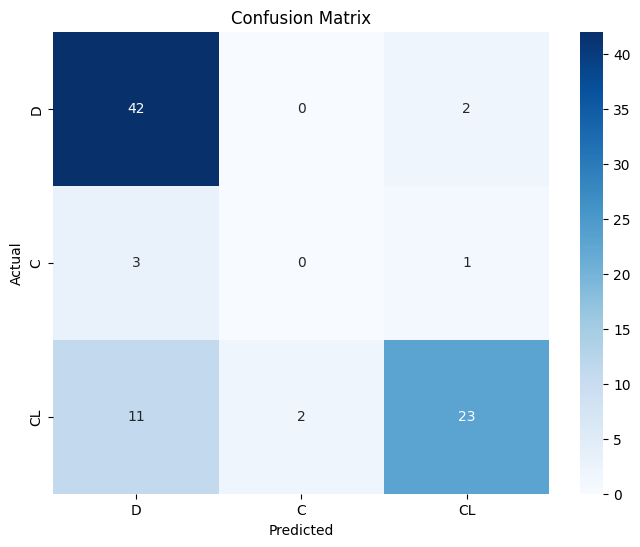

In [58]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
print("K-Nearest Neighbors Classifier")
print_error_classification(y_test, knn_classifier.predict(X_test))

Decision Tree Classifier
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1-Score: 0.77


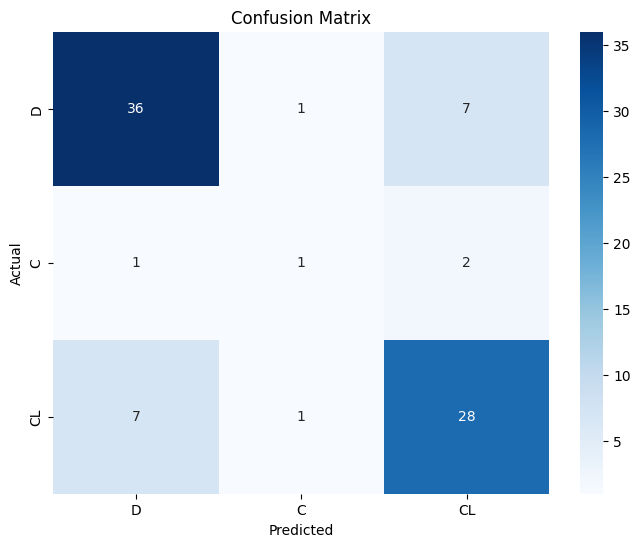

In [59]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
print("Decision Tree Classifier")
print_error_classification(y_test, decision_tree_classifier.predict(X_test))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.86


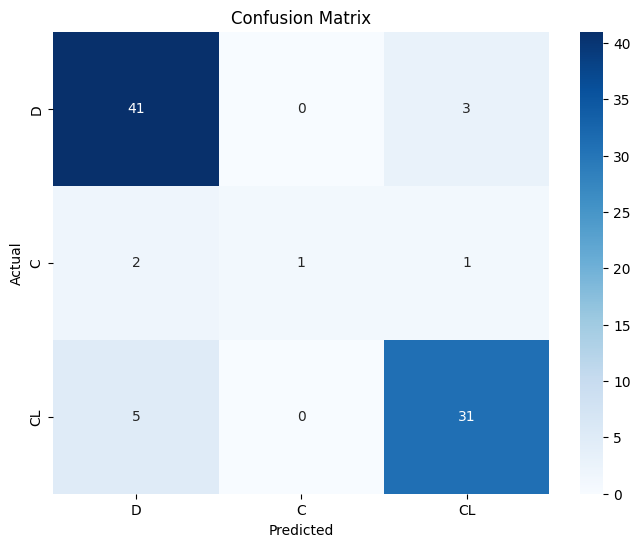

In [60]:
# XG Boost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
print("XGBoost Classifier")
print_error_classification(y_test, xgb_classifier.predict(X_test))

Random Forest Classifier
Accuracy: 0.80
Precision: 0.76
Recall: 0.80
F1-Score: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


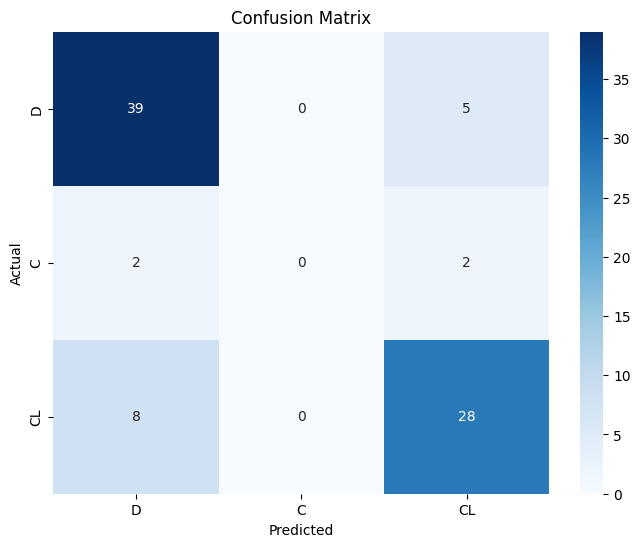

In [61]:
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
random_forest_classifier.fit(X_train, y_train)
print("Random Forest Classifier")
print_error_classification(y_test, random_forest_classifier.predict(X_test))

In [62]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest_classifier, "random_forest_classifier.pkl")
joblib.dump(decision_tree_classifier, "decision_tree_classifier.pkl")
joblib.dump(xgb_classifier, "xgb_classifier.pkl")

['xgb_classifier.pkl']

# Testing & Prediction

In [63]:
datatest=pd.read_csv('test_data.csv')
datatest.head()

,ID,N_Days,Drug,Age (years),Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,322.0,2011.0,0,64.0,0,0,1,0,0,1.1,279.2,3.69,69.4,884.00,115.940,93.0,139.0,10.5,3.0
1,325.0,4795.0,0,34.0,0,0,1,0,0,1.8,307.4,3.24,67.8,7095.36,76.884,107.8,291.6,18.0,2.0
2,389.0,1581.0,0,67.0,0,0,1,0,0,0.7,311.8,3.06,55.4,993.20,79.400,118.0,165.0,10.0,4.0
3,57.0,3282.0,0,54.0,0,0,1,0,1,2.3,260.0,3.18,231.0,11320.20,105.780,94.0,216.0,12.4,3.0
4,154.0,140.0,0,69.0,1,0,0,1,2,2.4,168.0,2.56,225.0,1056.00,120.900,75.0,108.0,14.1,3.0


In [64]:
datatest.shape

(84, 19)

In [65]:
model_name=joblib.load('xgb_classifier.pkl')
prediction = model_name.predict(X_test)
#prediction = model_name.predict(datatest)
prediction

array([0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2])

In [66]:
# Assuming you have used LabelEncoder for encoding
from sklearn.preprocessing import LabelEncoder

# Your original labels
original_labels = ['D', 'C', 'CL']

# Initialize LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(original_labels)  # Fit it with the original labels

# Convert the predicted outputs back to original labels
predicted_labels = label_encoder.inverse_transform(prediction)

# Display the predicted labels
print(predicted_labels)


['C' 'C' 'C' 'D' 'D' 'D' 'C' 'C' 'C' 'D' 'D' 'C' 'C' 'C' 'D' 'C' 'C' 'D'
 'D' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'D' 'D' 'D'
 'D' 'C' 'C' 'D' 'D' 'C' 'D' 'CL' 'D' 'C' 'D' 'C' 'D' 'C' 'D' 'D' 'C' 'C'
 'C' 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'C' 'C' 'D' 'C' 'C' 'D' 'D' 'C' 'C' 'C'
 'C' 'D' 'D' 'C' 'C' 'D' 'C' 'C' 'C' 'C' 'D' 'D']


In [67]:
result={'Status':predicted_labels}
pd.DataFrame(result).to_csv('status_predictions.csv',index=False)

In [68]:
pd.read_csv('status_predictions.csv')

,Status
0,C
1,C
2,C
3,D
4,D
...,...
79,C
80,C
81,C
82,D
